<br><br>
<h1 align="center"> 01 Initial Analysis </h1>
<h4 align="center"> ( Data Cleaning and Praparation ) </h4>
<br><br>

In [1]:
'''import thpe libraries'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

'''We will use ggplot for the initial plots.'''
plt.style.use('ggplot')

In [2]:
'''load the data. It's big, set low_memory=False'''
loan_data = pd.read_csv('/opt/apps/ml-data/bigdata/lending_club/loan.csv', low_memory=False)

In [3]:
'''How many rows and columns?'''
print(loan_data.shape)

(2260668, 145)


In [4]:
'''Take a glance on the data'''
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
'''A glance of the numericadl distribution'''
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,dti,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,0.0,2.258957e+06,...,10613.0,10613.000000,10613.0,10613.000000,8426.000000,10613.000000,10613.000000,33056.000000,33056.000000,33056.000000
mean,NaN,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309291e+01,4.458076e+02,7.799243e+04,NaN,1.882420e+01,...,3.0,155.006696,3.0,13.686422,454.840802,11628.036442,193.606331,5030.606922,47.775600,13.148596
std,NaN,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832114e+00,2.671737e+02,1.126962e+05,NaN,1.418333e+01,...,0.0,129.113137,0.0,9.728138,375.830737,7615.161123,198.694368,3692.027842,7.336379,8.192319
min,NaN,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,NaN,-1.000000e+00,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,NaN,1.189000e+01,...,3.0,59.370000,3.0,5.000000,174.967500,5628.730000,43.780000,2227.000000,45.000000,6.000000
50%,NaN,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,NaN,1.784000e+01,...,3.0,119.040000,3.0,15.000000,352.605000,10044.220000,132.890000,4172.855000,45.000000,14.000000
75%,NaN,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,NaN,2.449000e+01,...,3.0,213.260000,3.0,22.000000,622.792500,16114.940000,284.180000,6870.782500,50.000000,18.000000
max,NaN,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,NaN,9.990000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [6]:
'''
A first look at the data, null values, data types, unique values etc.
Check which columns are having all null values. We need to drop those columns.
Also, check the columns having one or more null values. We need to take care of them.
'''
cols = loan_data.columns
null_count = 0
null_pct = 'None'
d = []
d_types = loan_data.dtypes

for ind, col in enumerate(cols):
    if loan_data[col].isnull().all():
        null_count = 'all'
        null_pct = '100%'
    else:
        null_count = loan_data[col].isnull().sum()
        total_records = len(loan_data)
        if null_count > 0 and null_count < total_records*(0.1):
            null_pct = 'less than 10%'
        elif null_count >= total_records*(0.1) and null_count < total_records*(0.2):
            null_pct = '10 to 20%'
        elif null_count >= total_records*(0.2) and null_count < total_records*(0.3):
            null_pct = '20 to 30%'
        elif null_count >= total_records*(0.3) and null_count < total_records*(0.4):
            null_pct = '30 to 40%'
        elif null_count >= total_records*(0.4) and null_count < total_records*(0.5):
            null_pct = '40 to 50%'
        elif null_count >= total_records*(0.5) and null_count < total_records*(0.75):
            null_pct = '50 to 75%'
        elif null_count >= total_records*(0.75) and null_count < total_records*(0.9):
            null_pct = '50 to 75%'
        elif null_count >= total_records*(0.9):
            null_pct = 'more than 90%'
    

    d.append({'col': col, 'null_count': null_count, 'null_pct': null_pct, 'd_type': d_types[col], 
              'n_unique': loan_data[col].nunique()})
    null_count = 0
    null_pct = 'None'
    
    
loan_data_info = pd.DataFrame(d)

# Write the loan_data_info to CSV file
# loan_data_info.to_csv('loan_features.csv', sep=',', encoding='UTF-8')

# Write the loan_data_info to .xlsx file
#loan_data_info.to_csv('loan_features.xlsx')

# Display the dataframe as HTML table
display(HTML(loan_data_info.to_html()))
    
    

,col,null_count,null_pct,d_type,n_unique
0,id,all,100%,float64,0
1,member_id,all,100%,float64,0
2,loan_amnt,0,None,int64,1572
3,funded_amnt,0,None,int64,1572
4,funded_amnt_inv,0,None,float64,10057
5,term,0,None,object,2
6,int_rate,0,None,float64,673
7,installment,0,None,float64,93296
8,grade,0,None,object,7
9,sub_grade,0,None,object,35


In [7]:
'''How many missing values in the data set?'''
loan_data_info['null_pct'].value_counts()

less than 10%    54
more than 90%    35
None             32
30 to 40%        12
50 to 75%         6
100%              3
40 to 50%         2
10 to 20%         1
Name: null_pct, dtype: int64

In [8]:
'''What is the major data types?'''
loan_data_info['d_type'].value_counts()

float64    105
object      36
int64        4
Name: d_type, dtype: int64

In [9]:
'''Remove all domain-expert identified columns'''
removed_cols = pd.read_csv('removed_cols.csv')
print('Total columns removed:', len(removed_cols))

loan_data.drop(columns=removed_cols['col'], inplace=True)

print(loan_data.shape)

Total columns removed: 109
(2260668, 36)


In [10]:
'''
We will drop all the Current loans. 
We will work on only the completed loans.
Current loans may or may not turn into a good or bad loan.
'''
loan_data[loan_data["loan_status"]=='Current']

indexNames = loan_data[loan_data["loan_status"]=='Current'].index
loan_data.drop(indexNames , inplace=True)
print(loan_data.shape)

(1340973, 36)


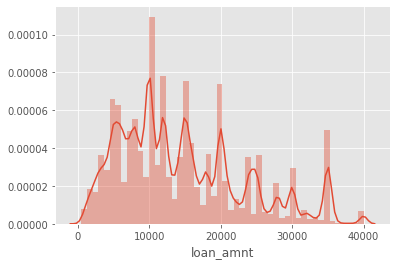

In [11]:
'''Maximum loan amount range is $5k to $ 20k'''
sns.distplot(loan_data['loan_amnt'])

plt.show()

In [12]:
'''There are two loan terms'''
loan_data['term'].value_counts()

 36 months    1011413
 60 months     329560
Name: term, dtype: int64

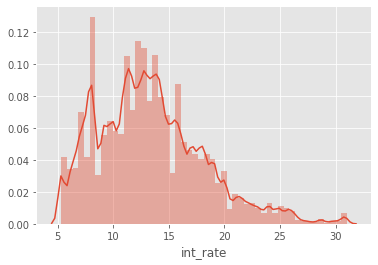

In [13]:
'''Most of the interest range is between 5% to 15%'''
sns.distplot(loan_data['int_rate'])

plt.show()

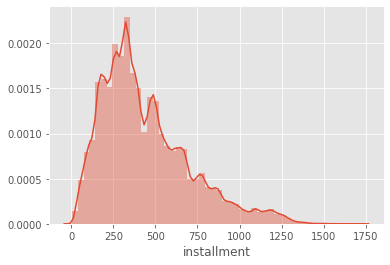

In [14]:
'''Most of the installment range is between $200 to $500'''
sns.distplot(loan_data['installment'])

plt.show()

In [15]:
'''LC assigned grade and sub grade counts'''
loan_data.groupby(['grade', 'sub_grade']).count()

loan_amnt   term  int_rate  installment  emp_length  \
grade sub_grade                                                        
A     A1             41509  41509     41509        41509       39189   
      A2             36119  36119     36119        36119       34126   
      A3             37030  37030     37030        37030       34999   
      A4             51105  51105     51105        51105       48288   
      A5             62829  62829     62829        62829       59697   
B     B1             70083  70083     70083        70083       66037   
      B2             72977  72977     72977        72977       68688   
      B3             80861  80861     80861        80861       76282   
      B4             82411  82411     82411        82411       77715   
      B5             81770  81770     81770        81770       76815   
C     C1             85187  85187     85187        85187       80049   
      C2             79228  79228     79228        79228       74560   
      C3             75208  75208     75208        75208       70748   
      C4             74933  74933     74933        74933       70469   
      C5             68171  68171     68171        68171       64050   
D     D1             51803  51803     51803        51803       48390   
      D2             45293  45293     45293        45293       42423   
      D3             39953  39953     39953        39953       37256   
      D4             36118  36118     36118        36118       33905   
      D5             30591  30591     30591        30591       28688   
E     E1             24025  24025     24025        24025       22549   
      E2             21730  21730     21730        21730       20519   
      E3             18766  18766     18766        18766       17682   
      E4             16045  16045     16045        16045       15183   
      E5             14899  14899     14899        14899       14061   
F     F1             10165  10165     10165        10165        9603   
      F2              7334   7334      7334         7334        6974   
      F3              6249   6249      6249         6249        5919   
      F4              4984   4984      4984         4984        4740   
      F5              4062   4062      4062         4062        3863   
G     G1              3086   3086      3086         3086        2919   
      G2              2202   2202      2202         2202        2100   
      G3              1674   1674      1674         1674        1594   
      G4              1363   1363      1363         1363        1312   
      G5              1210   1210      1210         1210        1153   

                 home_ownership  annual_inc  verification_status  issue_d  \
grade sub_grade                                                             
A     A1                  41509       41509                41509    41509   
      A2                  36119       36118                36119    36119   
      A3                  37030       37028                37030    37030   
      A4                  51105       51105                51105    51105   
      A5                  62829       62828                62829    62829   
B     B1                  70083       70083                70083    70083   
      B2                  72977       72977                72977    72977   
      B3                  80861       80861                80861    80861   
      B4                  82411       82411                82411    82411   
      B5                  81770       81770                81770    81770   
C     C1                  85187       85187                85187    85187   
      C2                  79228       79228                79228    79228   
      C3                  75208       75208                75208    75208   
      C4                  74933       74933                74933    74933   
      C5                  68171       68171                68171    68171   
D     D1                  51803       51803

In [16]:
'''Employment length of the applicant(s)'''
loan_data['emp_length'].fillna('5 years', inplace=True)
loan_data['emp_length'].value_counts()

10+ years    439791
5 years      162360
2 years      121342
< 1 year     108194
3 years      107330
1 year        88431
4 years       80360
6 years       62592
8 years       60501
7 years       59450
9 years       50622
Name: emp_length, dtype: int64

In [17]:
'''Home ownership status of the applicant(s)'''
loan_data['home_ownership'].value_counts()

MORTGAGE    662056
RENT        534071
OWN         144321
ANY            290
OTHER          182
NONE            53
Name: home_ownership, dtype: int64

In [18]:
median_inc_by_state = loan_data.groupby(loan_data['addr_state'])[['annual_inc']].median()

def get_median_inc_by_state(state):
    return median_inc_by_state.loc[state][0]

In [19]:
'''
There are 4 missing values in annual_inc column. 
We will fill them in using median value of that state.
There are lots of 0.0 in the annual_inc column. We will replace them using the average by state later.
'''
for index, row in loan_data.iterrows():
    if(pd.isnull(row['annual_inc'])):
        loan_data.set_value(index, 'annual_inc', get_median_inc_by_state(row['addr_state']))
        # print('annual_inc updated')


/home/sanatan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


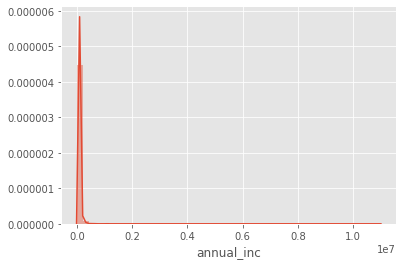

In [20]:
sns.distplot(loan_data['annual_inc'])

plt.show()

In [21]:
'''Verification status of the applicant(s)'''
loan_data['verification_status'].value_counts()

Source Verified    518581
Verified           419316
Not Verified       403076
Name: verification_status, dtype: int64

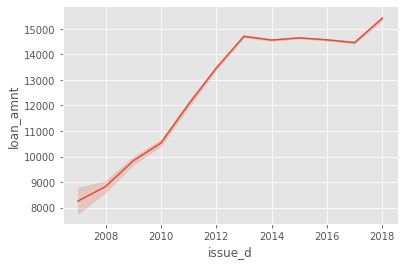

In [22]:
'''How the loans were approved over time'''
loan_data['issue_d'] = loan_data['issue_d'].astype('datetime64[ns]')
sns.lineplot(x=loan_data['issue_d'].dt.year, y=loan_data['loan_amnt'], data=loan_data)
plt.show()

In [23]:
'''This is the target variable to find out the bad loan(s) or default loan(s)'''
loan_data['loan_status'].value_counts()

Fully Paid                                             1041952
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

In [24]:
'''Was the payment plan set for loans?'''
loan_data['pymnt_plan'].value_counts()

n    1340295
y        678
Name: pymnt_plan, dtype: int64

In [25]:
'''What are the purposes for different loan(s)?'''
loan_data['purpose'].value_counts()

debt_consolidation    778868
credit_card           292565
home_improvement       87022
other                  77894
major_purchase         29315
small_business         15700
medical                15575
car                    14511
moving                  9504
vacation                8996
house                   7316
wedding                 2350
renewable_energy         934
educational              423
Name: purpose, dtype: int64

In [26]:
'''How the loan counts are distributed in different states?'''
loan_data['addr_state'].value_counts()

CA    195921
NY    109934
TX    109836
FL     95651
IL     51343
NJ     48335
PA     45441
OH     43470
GA     43280
VA     37931
NC     37618
MI     35090
AZ     32536
MD     31357
MA     30901
CO     29485
WA     28993
MN     23827
IN     21543
MO     21211
TN     20261
NV     20127
CT     19696
WI     17694
AL     16633
OR     16311
SC     15878
LA     15491
KY     12777
OK     12201
KS     11142
AR     10013
UT      9982
NM      7354
HI      6746
MS      6635
NH      6412
RI      5838
WV      4824
MT      3781
DE      3776
NE      3563
DC      3460
AK      3180
WY      2902
SD      2750
VT      2625
ME      1995
ID      1631
ND      1578
IA        14
Name: addr_state, dtype: int64

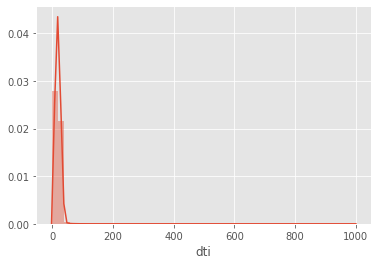

In [27]:
'''
The missing values are replaced by median dti.
How the dti of the loans are distributed?
'''
loan_data['dti'].fillna(loan_data['dti'].median(), inplace=True)
sns.distplot(loan_data['dti'])

plt.show()

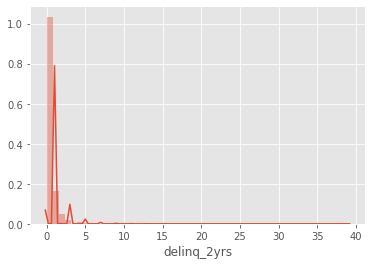

In [28]:
'''
We will fill the last 2 years delinquency count with zero(s). 
Lets assume there has been no delinquency for those loans.
'''
# loan_data['delinq_2yrs'].describe()

loan_data['delinq_2yrs'].fillna(0.0, inplace=True)
sns.distplot(loan_data['delinq_2yrs'])

plt.show()

In [29]:
'''
There are 29 missing values. 
We will fill in these values using issue_d.
Assume this loan is the first credit line getting opened.
We will create a new variable 'age_of_credit' from this.
'''
loan_data['earliest_cr_line'].fillna(loan_data['issue_d'], inplace=True)
loan_data['earliest_cr_line'] = loan_data['earliest_cr_line'].astype('datetime64[ns]')

In [30]:
age_delta = (loan_data['issue_d'] - loan_data['earliest_cr_line'])

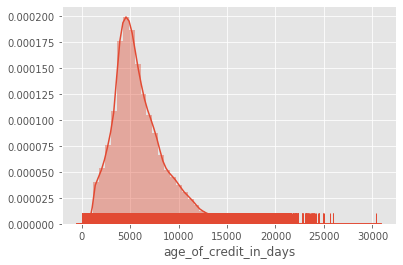

In [31]:
loan_data['age_of_credit_in_days'] = np.nan


def age_of_credit(time_delta):
    return time_delta.days
    
    
loan_data['age_of_credit_in_days'] = age_delta.apply(age_of_credit)
sns.distplot(loan_data['age_of_credit_in_days'], rug=True)

plt.show()

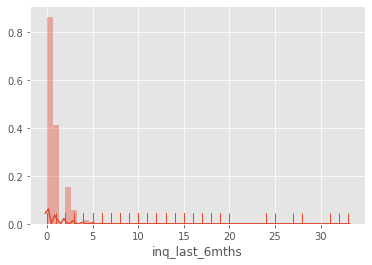

In [32]:
'''
The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
There are 30 missing values.
We will fill them with zero assuming no inquiries.
'''
loan_data['inq_last_6mths'].fillna(0.0, inplace=True)
sns.distplot(loan_data['inq_last_6mths'], rug=True)

plt.show()

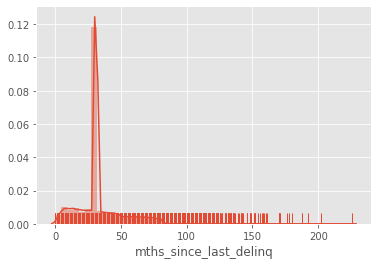

In [33]:
'''
The number of months since the borrower last delinquency.
There are 1158502 missing values. Will fill in the median value.
'''
loan_data['mths_since_last_delinq'].fillna(loan_data['mths_since_last_delinq'].median(), inplace=True)
sns.distplot(loan_data['mths_since_last_delinq'], rug=True)

plt.show()

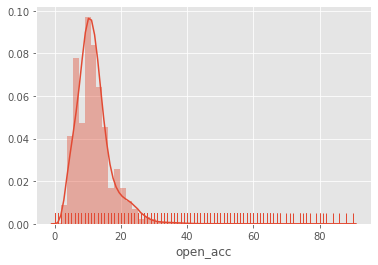

In [34]:
'''
The number of open credit lines in the borrower.
'''
loan_data['open_acc'].fillna(0.0, inplace=True)
sns.distplot(loan_data['open_acc'], rug=True)

plt.show()

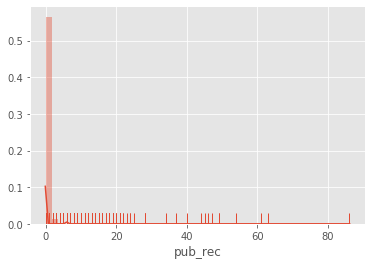

In [35]:
'''
Number of derogatory public records.
'''
loan_data['pub_rec'].fillna(0.0, inplace=True)
sns.distplot(loan_data['pub_rec'], rug=True)

plt.show()

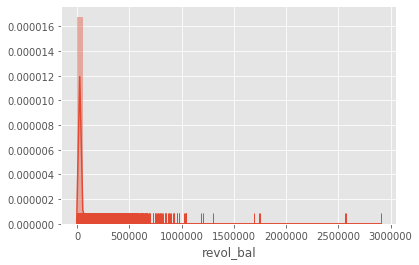

In [36]:
'''Total credit revolving balance'''
sns.distplot(loan_data['revol_bal'], rug=True)

plt.show()

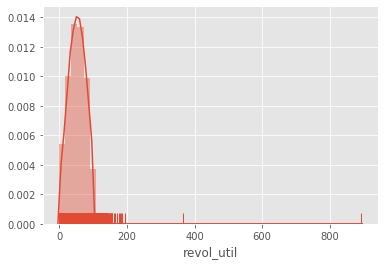

In [37]:
'''Revolving line utilization rate.'''
loan_data['revol_util'].fillna(loan_data['revol_util'].median(), inplace=True)
sns.distplot(loan_data['revol_util'], rug=True)

plt.show()

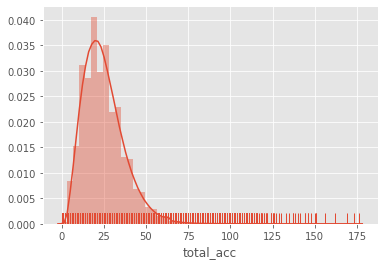

In [38]:
'''The total number of credit lines currently in the borrower's credit file.'''
loan_data['total_acc'].fillna(0.0, inplace=True)
sns.distplot(loan_data['total_acc'], rug=True)

plt.show()

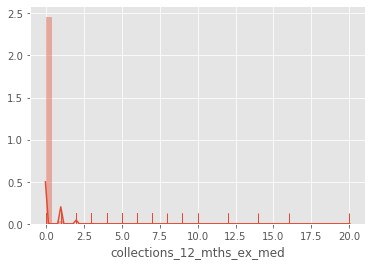

In [39]:
'''Number of collections in 12 months excluding medical collections.'''
loan_data['collections_12_mths_ex_med'].fillna(0.0, inplace=True)
sns.distplot(loan_data['collections_12_mths_ex_med'], rug=True)

plt.show()

In [40]:
'''Indicates whether the loan is an individual application or a joint application with two co-borrowers'''
loan_data["application_type"].value_counts()

Individual    1314044
Joint App       26929
Name: application_type, dtype: int64

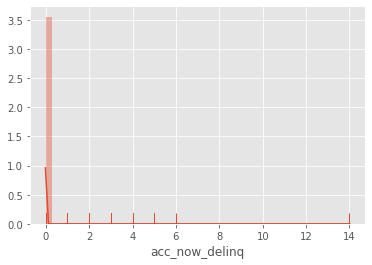

In [41]:
'''
The number of accounts on which the borrower is now delinquent.
There are 29 missing values, will fillin 0s
'''
loan_data['acc_now_delinq'].fillna(0.0, inplace=True)
sns.distplot(loan_data['acc_now_delinq'], rug=True)

plt.show()

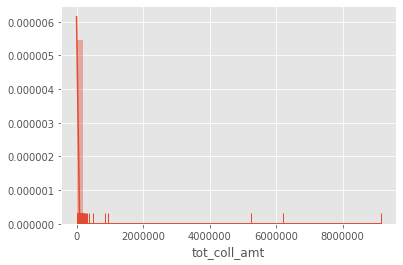

In [42]:
'''Total collection amounts ever owed.'''
loan_data['tot_coll_amt'].fillna(0.0, inplace=True)
sns.distplot(loan_data['tot_coll_amt'], rug=True)

plt.show()

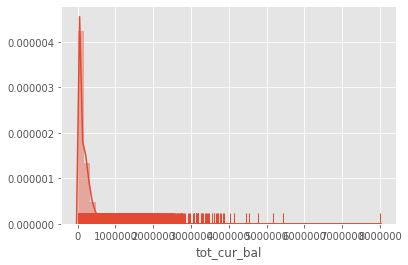

In [43]:
'''Total current balance of all accounts'''
loan_data['tot_cur_bal'].fillna(loan_data['tot_cur_bal'].median(), inplace=True)
sns.distplot(loan_data['tot_cur_bal'], rug=True)

plt.show()

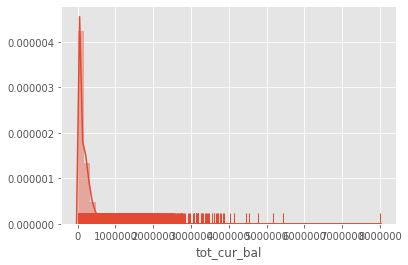

In [44]:
'''Total revolving high credit/credit limit'''
loan_data['total_rev_hi_lim'].fillna(loan_data['total_rev_hi_lim'].median(), inplace=True)
sns.distplot(loan_data['tot_cur_bal'], rug=True)

plt.show()

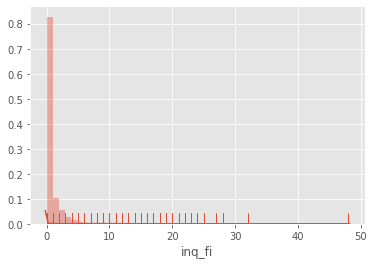

In [45]:
'''Number of personal finance inquiries'''
loan_data['inq_fi'].fillna(0.0, inplace=True)
sns.distplot(loan_data['inq_fi'], rug=True)

plt.show()

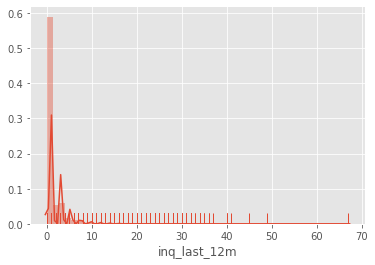

In [46]:
'''Number of credit inquiries in past 12 months'''
loan_data['inq_last_12m'].fillna(0.0, inplace=True)
sns.distplot(loan_data['inq_last_12m'], rug=True)

plt.show()

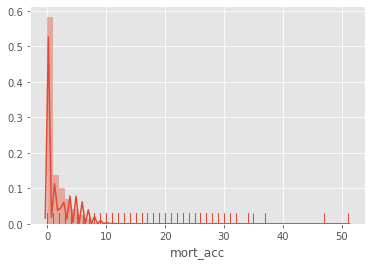

In [47]:
'''Number of mortgage accounts'''
loan_data['mort_acc'].fillna(0.0, inplace=True)
sns.distplot(loan_data['mort_acc'], rug=True)

plt.show()

In [48]:
'''Flags whether or not the borrower is on a hardship plan'''
loan_data["hardship_flag"].value_counts()

N    1340098
Y        875
Name: hardship_flag, dtype: int64

In [49]:
'''The method by which the borrower receives their loan'''
loan_data["disbursement_method"].value_counts()

Cash         1334300
DirectPay       6673
Name: disbursement_method, dtype: int64

In [50]:
'''Determining the loans that are bad from loan_status column'''

medium_risk = ["In Grace Period",
               "Late (16-30 days)", 
               "Late (31-120 days)"]

high_risk = ["Default", 
             "Charged Off", 
             "Does not meet the credit policy. Status:Charged Off"]

loan_data['risk'] = np.nan


def loan_closing_status(status):
    if status in medium_risk:
        return 'Medium Risk'
    elif status in high_risk:
        return 'High Risk'
    else:
        return 'Low Risk'
    

loan_data['risk'] = loan_data['loan_status'].apply(loan_closing_status)

loan_data.reset_index()

,index,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,inq_fi,inq_last_12m,mort_acc,hardship_flag,disbursement_method,age_of_credit_in_days,risk
0,100,30000,36 months,22.35,1151.16,D,D5,5 years,MORTGAGE,100000.0,...,0.0,472330.0,42200.0,1.0,3.0,1.0,N,Cash,2526,Low Risk
1,152,40000,60 months,16.14,975.71,C,C4,< 1 year,MORTGAGE,45000.0,...,0.0,271068.0,54200.0,4.0,4.0,1.0,N,Cash,3470,Low Risk
2,170,20000,36 months,7.56,622.68,A,A3,10+ years,MORTGAGE,100000.0,...,0.0,515779.0,85100.0,2.0,0.0,5.0,N,Cash,7243,Low Risk
3,186,4500,36 months,11.31,147.99,B,B3,10+ years,RENT,38500.0,...,306.0,29137.0,29200.0,0.0,3.0,0.0,N,Cash,5479,Low Risk
4,215,8425,36 months,27.27,345.18,E,E5,3 years,MORTGAGE,450000.0,...,0.0,690320.0,56000.0,7.0,5.0,4.0,N,Cash,7731,Low Risk
5,269,20000,60 months,17.97,507.55,D,D1,4 years,RENT,57000.0,...,0.0,33356.0,72700.0,0.0,0.0,1.0,N,Cash,8645,Low Risk
6,271,6600,36 months,11.31,217.05,B,B3,10+ years,RENT,45000.0,...,0.0,26836.0,10600.0,0.0,0.0,0.0,N,Cash,3531,Low Risk
7,296,2500,36 months,13.56,84.92,C,C1,5 years,RENT,42000.0,...,0.0,18649.0,10500.0,2.0,1.0,0.0,N,Cash,5388,Low Risk
8,369,4000,36 months,17.97,144.55,D,D1,5 years,MORTGAGE,60000.0,...,0.0,106556.0,5200.0,3.0,3.0,2.0,N,Cash,4201,Low Risk
9,379,2700,36 months,8.19,84.85,A,A4,4 years,OWN,24000.0,...,449.0,75363.0,7400.0,1.0,0.0,0.0,N,Cash,5905,Low Risk


In [51]:
print(loan_data.shape)

(1340973, 38)


In [52]:
# Write the loan_data_info to CSV file
loan_data.to_csv('/opt/apps/ml-data/bigdata/lending_club/loan_data.csv', sep=',', index=False, encoding='UTF-8')